# **Assignment 2. Are Deeper Networks Better?**

* 使用Fully Connected Neural Network
* 在相同超參數設定下(batch_size=20; epochs=15; optimizer=‘Adam’)，比較10個不同深度(1 hidden layer, 5 hidden layers, 9 hidden layers,…, 37 hidden layers)神經網路模型的分類準確度
* 評論與回答”Are deeper networks better?”



In [8]:
# Install old-version Tensorflow if necessary
!pip install tensorflow==2.7.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.7.0 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.7.0


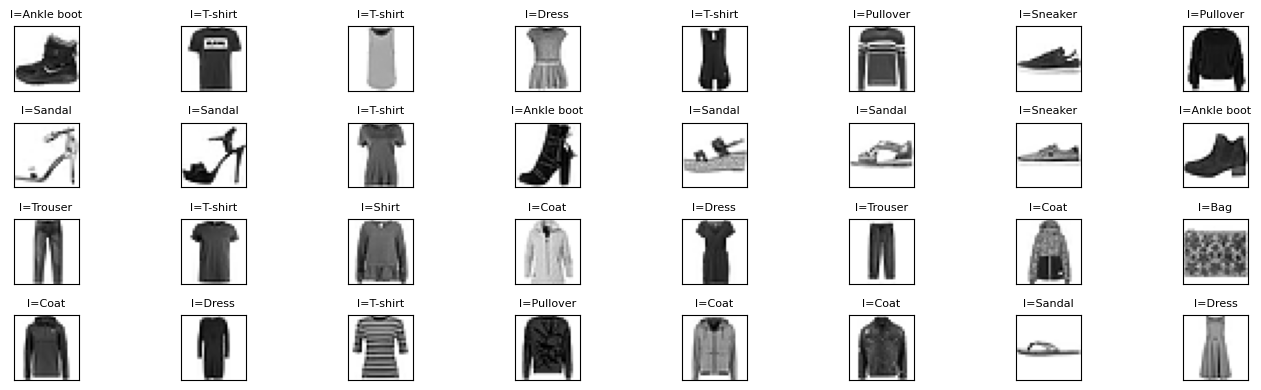

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from tensorflow.keras.datasets import fashion_mnist

#Load training data and testing from mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = fashion_mnist.load_data()
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

def plot_multiimages(images, labels, prediction, idx, num=32):
    plt.gcf().set_size_inches(14, 4)
    if num > 32: num = 32
    for i in range(0, num):
        ax=plt.subplot(4,8, 1+i)
        ax.imshow(images[idx],cmap='binary')
        title = "l=" + class_names[int(labels[idx])]
        if len(prediction) > 0:
            title = "l={},p={}".format(class_names[int(labels[idx])], class_names[prediction[idx]])
        else:
            title = "l={}".format(class_names[int(labels[idx])])
        ax.set_title(title, fontsize=8)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.tight_layout()
    plt.show()
plot_multiimages(x_train_image, y_train_label, [], 0, 32)

#Reshape the image from 2D image to 1D image of size 28*28
x_train = x_train_image.reshape(len(x_train_image), 28*28).astype('float32')
x_test = x_test_image.reshape(len(x_test_image), 28*28).astype('float32')
x_train_norm = x_train/255
x_test_norm = x_test/255
y_TrainOneHot = utils.to_categorical(y_train_label)
y_TestOneHot = utils.to_categorical(y_test_label)

Depth: 1, Test accuracy: 83.38%


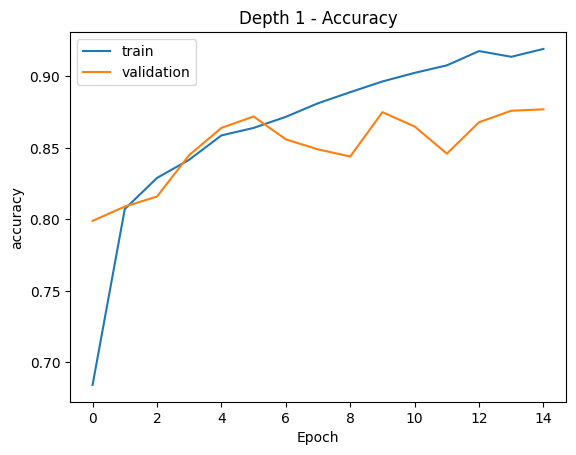

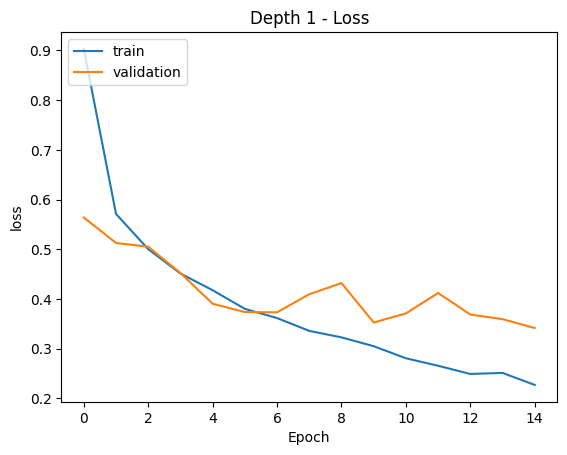

Depth: 5, Test accuracy: 82.55%


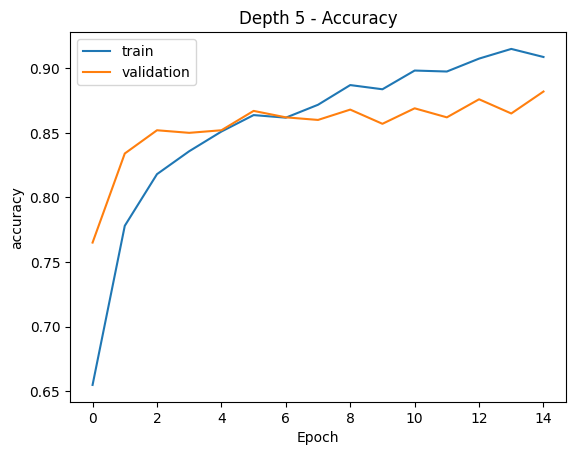

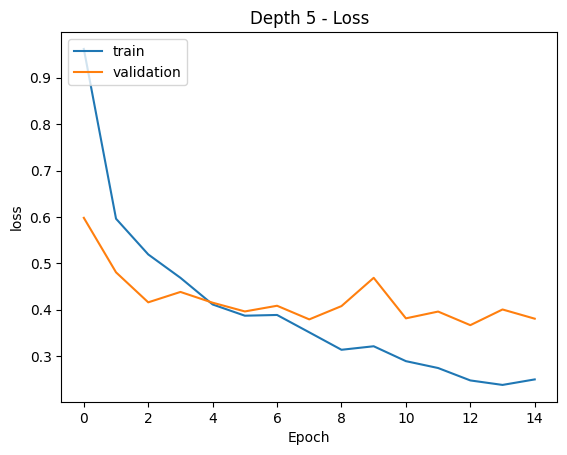

Depth: 9, Test accuracy: 82.39%


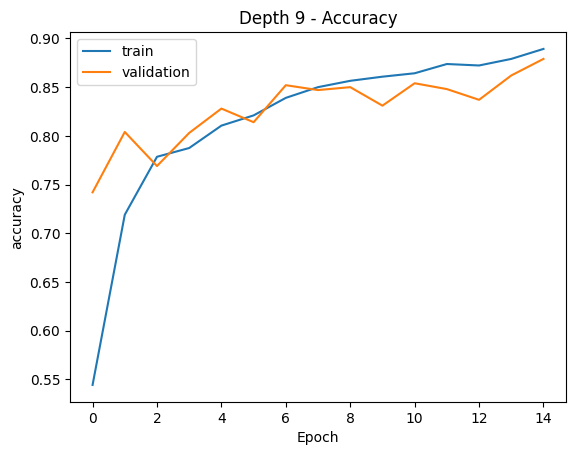

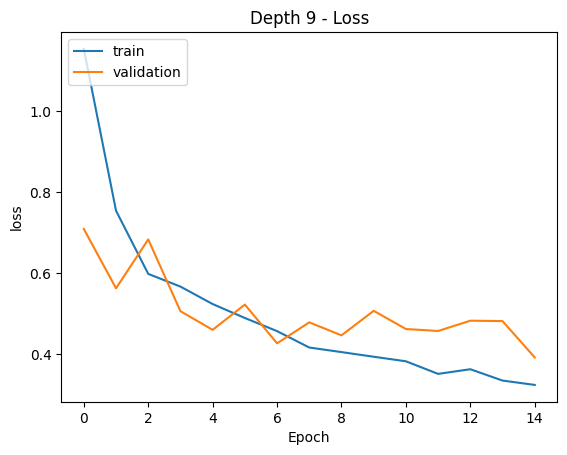

Depth: 13, Test accuracy: 78.15%


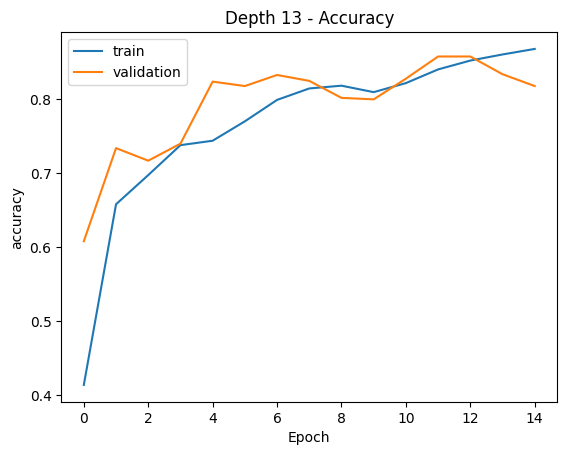

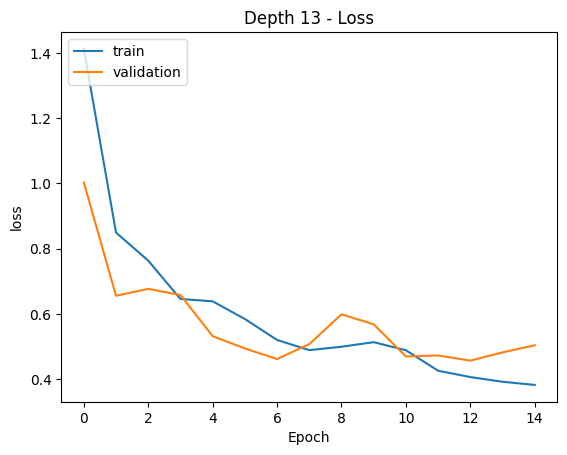

Depth: 17, Test accuracy: 75.68%


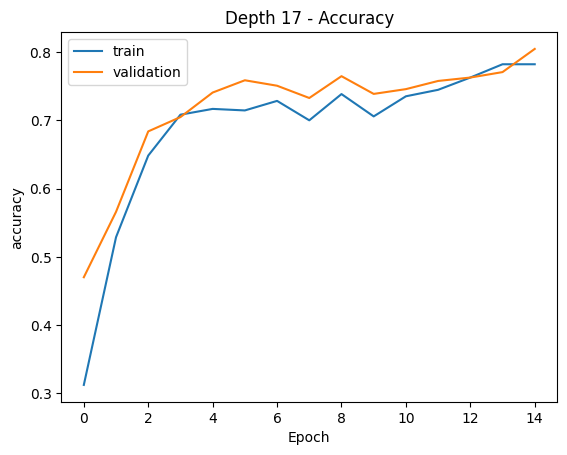

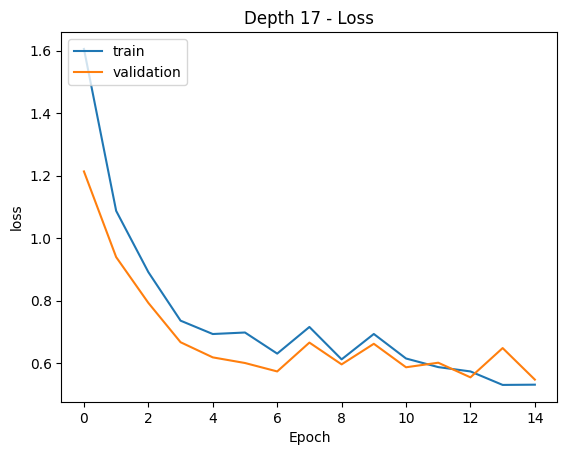

Depth: 21, Test accuracy: 67.29%


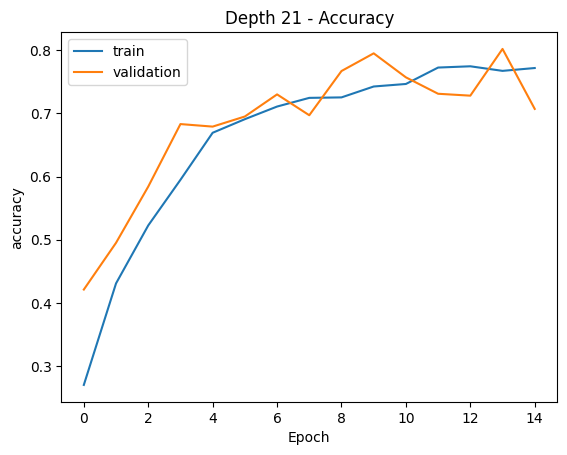

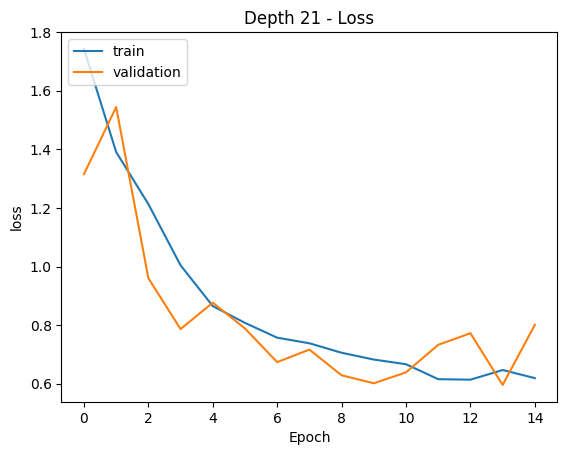

Depth: 25, Test accuracy: 73.07%


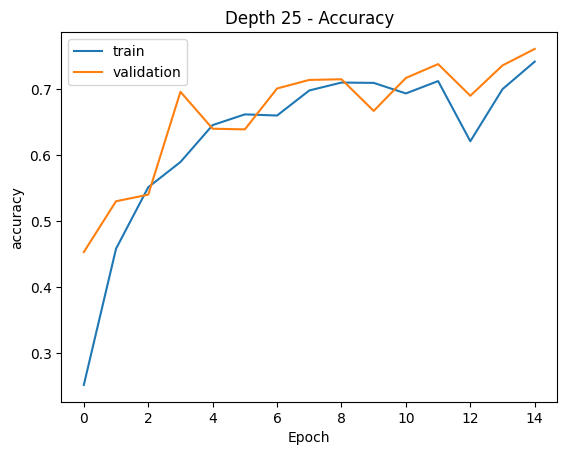

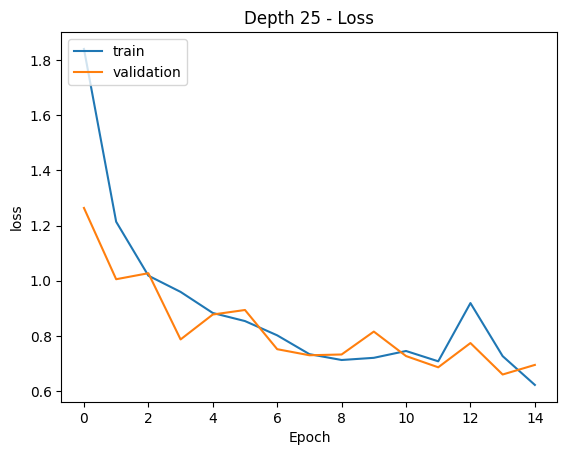

Depth: 29, Test accuracy: 67.96%


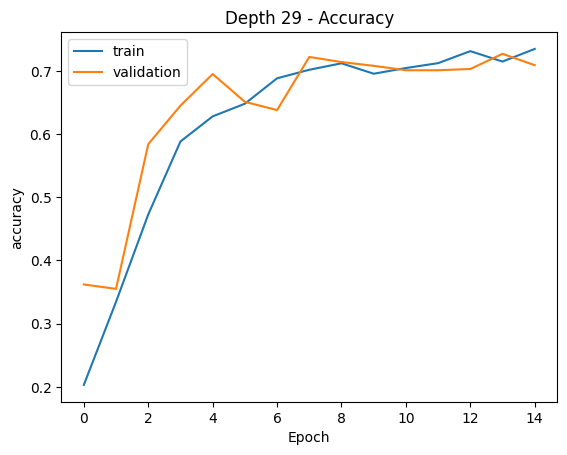

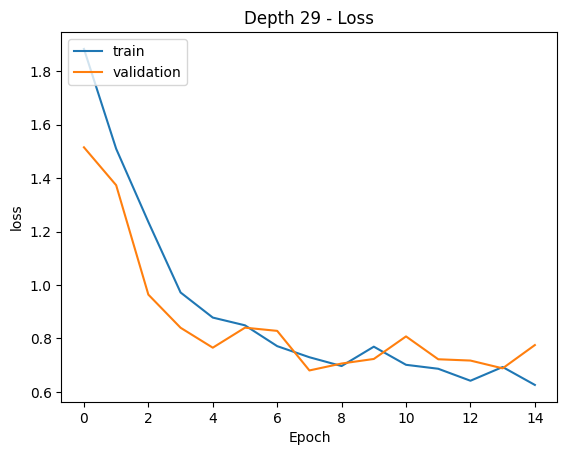

Depth: 33, Test accuracy: 59.93%


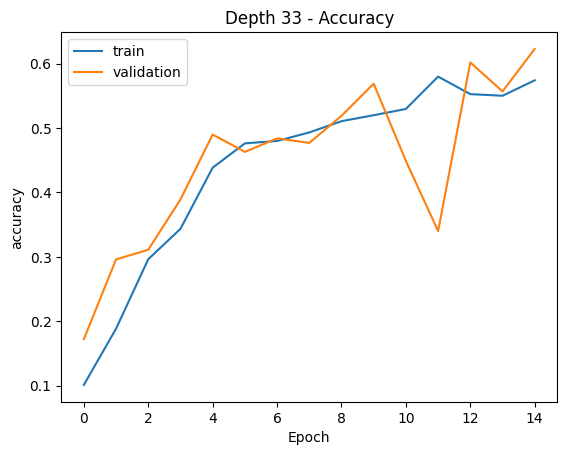

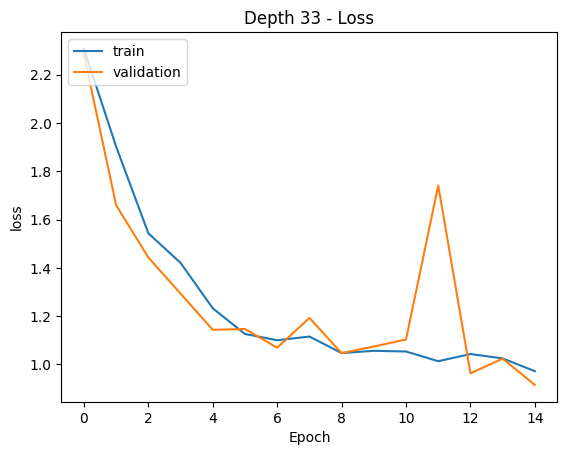

Depth: 37, Test accuracy: 10.00%


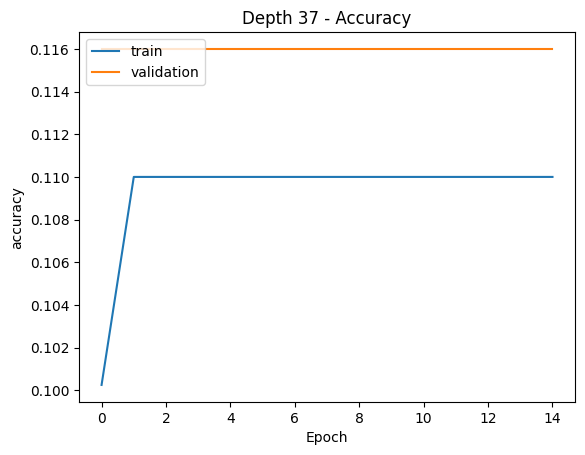

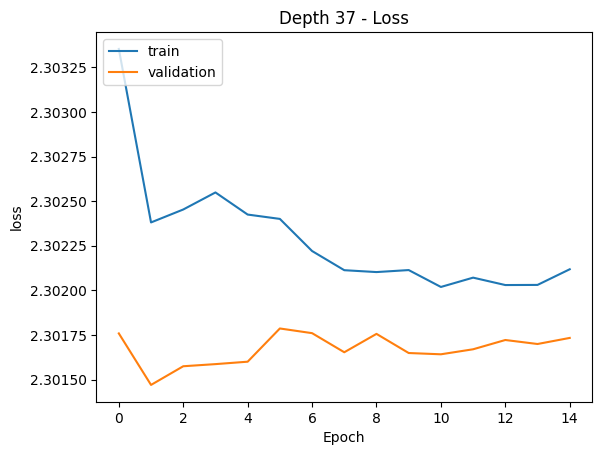


各深度模型的測試準確率：
   Depth  Test Accuracy
0      1      83.380002
1      5      82.550001
2      9      82.389998
3     13      78.149998
4     17      75.680000
5     21      67.290002
6     25      73.070002
7     29      67.960000
8     33      59.930003
9     37      10.000000


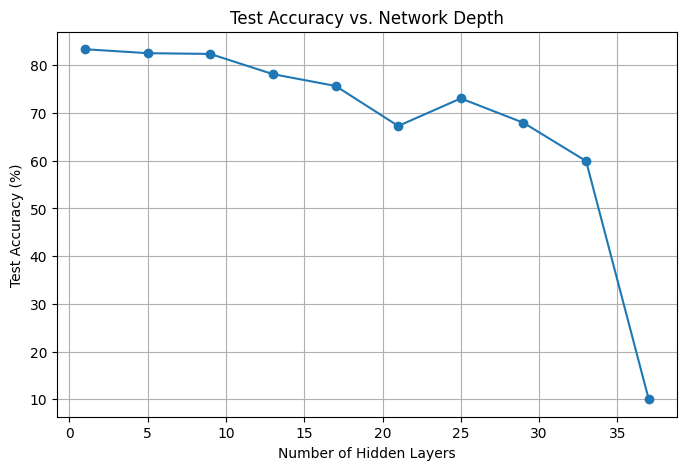


觀察：最大測試準確率為 83.38%，出現在 1 層。

淺層網路表現最佳，增加深度未必提升準確率。
整體來說，深度增加到某一程度後，準確率可能不再提升甚至下降，需考慮過擬合與訓練困難。



In [10]:
# 比較不同深度的 Fully Connected Neural Network，並顯示每個模型的訓練歷程
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd

depths = [1, 5, 9, 13, 17, 21, 25, 29, 33, 37]
num_units = 100
num_classes = 10
accuracies = []
histories = []

def show_train_history(train_history, train, validation, title=None):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title(title if title else 'Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

for depth in depths:
    model = Sequential()
    model.add(Dense(num_units, input_dim=784, activation='relu'))
    for _ in range(depth-1):
        model.add(Dense(num_units, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    train_history = model.fit(x=x_train_norm[0:5000], y=y_TrainOneHot[0:5000], validation_split=0.2, epochs=15, batch_size=20, verbose=0)
    scores = model.evaluate(x_test_norm, y_TestOneHot, verbose=0)
    accuracies.append(scores[1])
    histories.append(train_history)
    print(f"Depth: {depth}, Test accuracy: {scores[1]*100:.2f}%")
    # 顯示每個模型的訓練歷程
    show_train_history(train_history, 'accuracy', 'val_accuracy', title=f'Depth {depth} - Accuracy')
    show_train_history(train_history, 'loss', 'val_loss', title=f'Depth {depth} - Loss')

# 輸出結果表格
results_df = pd.DataFrame({'Depth': depths, 'Test Accuracy': [a*100 for a in accuracies]})
print("\n各深度模型的測試準確率：")
print(results_df)

# 繪製深度與準確率的關係圖
plt.figure(figsize=(8,5))
plt.plot(depths, [a*100 for a in accuracies], marker='o')
plt.title('Test Accuracy vs. Network Depth')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Test Accuracy (%)')
plt.grid(True)
plt.show()

# 自動化簡單討論
best_idx = results_df['Test Accuracy'].idxmax()
best_depth = results_df.loc[best_idx, 'Depth']
best_acc = results_df.loc[best_idx, 'Test Accuracy']
print(f"\n觀察：最大測試準確率為 {best_acc:.2f}%，出現在 {best_depth} 層。\n")
if best_depth == depths[0]:
    print("淺層網路表現最佳，增加深度未必提升準確率。")
elif best_depth == depths[-1]:
    print("最深層網路表現最佳，增加深度有助於提升準確率。")
else:
    print("最佳深度介於最淺與最深之間，過深或過淺都未必最佳。")
print("整體來說，深度增加到某一程度後，準確率可能不再提升甚至下降，需考慮過擬合與訓練困難。\n")